In [134]:
import torch
import random
import numpy as np
import torch.nn  as  nn  
import torch.optim as  optim
from   torchvision import datasets,  transforms
import seaborn as  sns   
import matplotlib.pyplot as  plt   # Download the MNIST dataset


In [135]:
"""
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# Set the seed for reproducibility
set_seed(42)"""

'\ndef set_seed(seed):\n    random.seed(seed)\n    np.random.seed(seed)\n    torch.manual_seed(seed)\n    torch.cuda.manual_seed(seed)\n    torch.cuda.manual_seed_all(seed)\n    torch.backends.cudnn.deterministic = True\n    torch.backends.cudnn.benchmark = False\n\n# Set the seed for reproducibility\nset_seed(42)'

In [136]:

def test(dataloader, model, criterion):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += criterion(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return correct, test_loss


def train(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = criterion(pred, y)


        # Add regularisation
        lamb = 0.001
        loss += lamb * torch.norm(model.fc1.weight, p=2)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


In [137]:
transform = transforms.ToTensor() 
train_dataset = datasets.MNIST(root   ='./data',  train=True   ,  download=True   , transform=transform) 
test_dataset = datasets.MNIST(root   ='./data',  train=False,  download=True   , transform=transform) 
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64 ,  shuffle=True   ) 
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

1.Regularization:
    a.Add L1 regularization to the 2nd layer (the layer after the input layer)
    b.Add L2 regularization instead on the 2nd layer. 
    c.What do you observe? (Hint: The lambda value used has a big impact on performance.)
    d.What is the purpose of adding regularization?

2.Dropout:
    a.Add a dropout layer between the first and second layer. What do you observe?
    b.What is the purpose of adding dropout?

3.Layers:
    a.Experiment with different amount of layers. What do you observe?
    b.Experiment with different amount of neurons in each layer. What do you observe?

4. Momentum:
    a. Try to add momentum to the SGD optimizer. 
    b. Test different values of momentum. What value do you get the highest accuracy?
    c. What happens if momentum is too high?

In [138]:
# CHECK SHAPE OF DATA INPUTS
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")


Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Using mps device


In [139]:

# Define model
class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Linear(in_features=28*28, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=64)
        self.fc3 = nn.Linear(in_features=64, out_features=10)

        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return x
model = MyNetwork().to(device)
print(model)


MyNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)


In [140]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Epoch 1
-------------------------------
loss: 2.320030  [   64/60000]
loss: 0.923547  [ 6464/60000]
loss: 0.794327  [12864/60000]
loss: 0.684940  [19264/60000]
loss: 0.669987  [25664/60000]
loss: 0.736530  [32064/60000]
loss: 0.692249  [38464/60000]
loss: 0.676076  [44864/60000]
loss: 0.680729  [51264/60000]
loss: 0.773888  [57664/60000]
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.619817 

Epoch 2
-------------------------------
loss: 0.638356  [   64/60000]
loss: 0.583386  [ 6464/60000]
loss: 0.540531  [12864/60000]
loss: 0.338563  [19264/60000]
loss: 0.619887  [25664/60000]
loss: 0.566098  [32064/60000]
loss: 0.494804  [38464/60000]
loss: 0.493966  [44864/60000]
loss: 0.699145  [51264/60000]
loss: 0.618479  [57664/60000]
Test Error: 
 Accuracy: 78.1%, Avg loss: 0.564833 

Epoch 3
-------------------------------
loss: 0.734811  [   64/60000]
loss: 0.430279  [ 6464/60000]
loss: 0.704967  [12864/60000]
loss: 0.705394  [19264/60000]
loss: 0.508748  [25664/60000]
loss: 0.597586  [32064/600

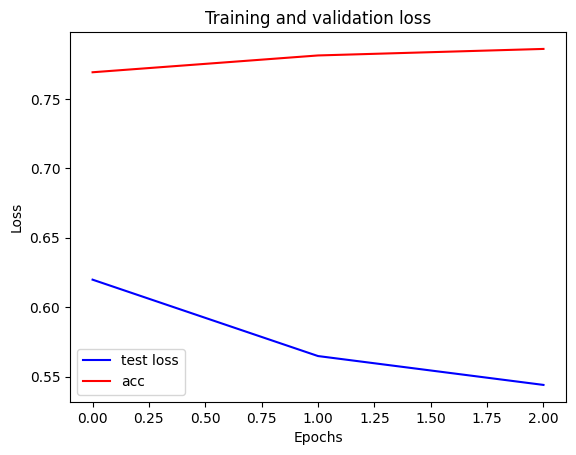

Done!


In [141]:

epochs = 3
loss_values = []
acc_values = []
epochs_list = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, criterion, optimizer)
    
    acc, loss = test(test_loader, model, criterion)
    loss_values.append(loss)
    acc_values.append(acc)
    epochs_list.append(t)

plt.plot(epochs_list, loss_values, 'b', label='test loss')
plt.plot(epochs_list, acc_values, 'r', label='acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Done!")
